# MAP inference

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Bayes_icon.svg" width="300px" height="300px" />

> In the fifth homework you will perform an application of the MAP inference we saw in class. For instance, you will design a Bayesian net-based based classifier, train and test it, and compare it according a benchmark.

> If further questions arise, please use the slack channel, or write me to esjimenezro@iteso.mx.

> **References:**
> - [Solving A Simple Classification Problem with Python — Fruits Lovers’ Edition](https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2)


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/e/ed/Bayes_icon.svg.</p>

___

## Data

The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly and it can be downloaded from [here](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt).

## 1. EDA

Perform some exploratory data analysis over the fruits dataset to get familiarized with the data.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fruits = pd.read_csv('fruit_data_with_colors.csv')
print(fruits.head())
print(fruits.shape)
print(fruits['fruit_name'].unique())
print(fruits.groupby('fruit_name').size())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
(59, 7)
['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


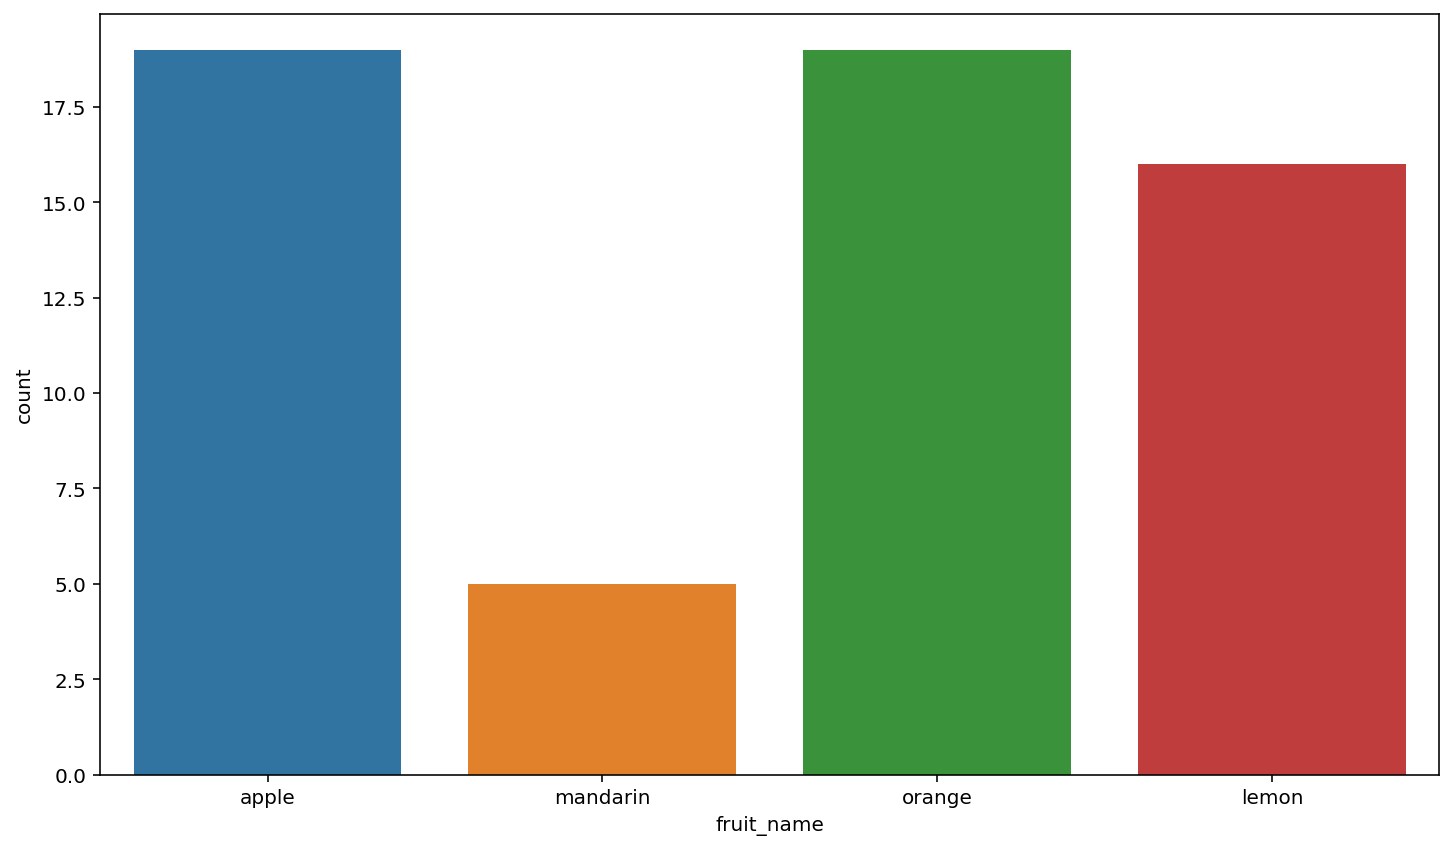

In [6]:
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

In [7]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


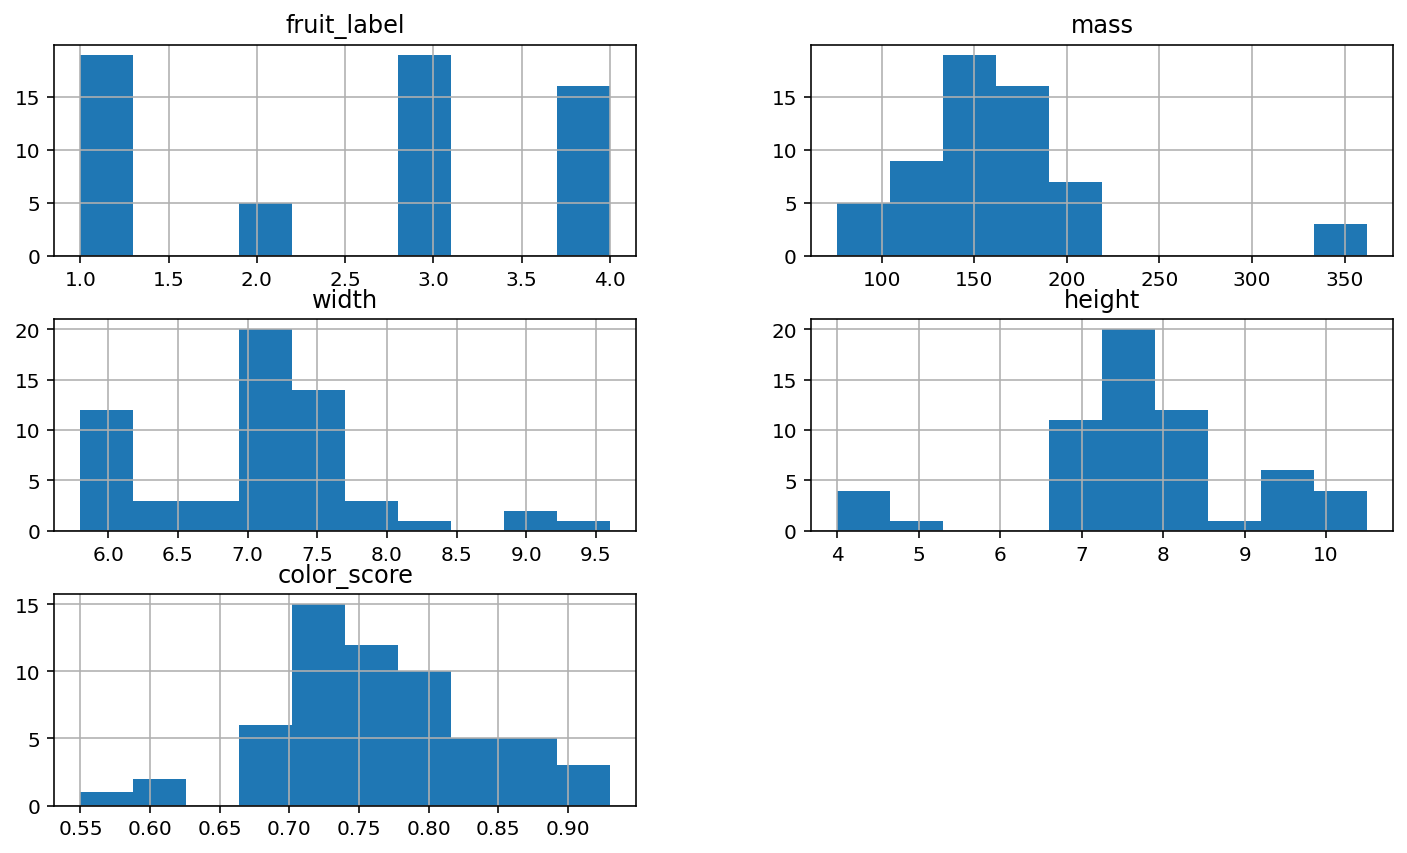

In [8]:
hist = fruits.hist(bins=10)

## 2. Design a logistic regression classifier

2.1. Split the dataset into train and test. Be sure to suffle the data because it comes ordered.

2.2. Train a logistic regression classifier, using as explainer variables the **mass**, the **width**, the **height**, and the **color_score** for the target variable **fruit_label**

2.3. Obtain the accuracy of your classifier over the test dataset.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [72]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)

In [73]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(pd.DataFrame(X_train).head())
print(pd.DataFrame(X_test).head())

          0         1         2         3
0  0.000000  0.029412  0.000000  0.684211
1  0.384058  0.411765  0.790323  0.447368
2  0.130435  0.029412  0.612903  0.473684
3  0.420290  0.441176  0.870968  0.447368
4  0.311594  0.323529  0.483871  1.000000
          0         1         2         3
0  0.471014  0.588235  0.596774  0.710526
1  0.021739  0.117647  0.064516  0.657895
2  0.282609  0.411765  0.564516  0.578947
3  0.449275  0.500000  0.790323  0.578947
4  0.275362  0.470588  0.500000  0.763158


In [77]:
model_logRegression_multiclass = LogisticRegression()
model_logRegression_multiclass.fit(X_train, y_train)

model_logRegression0 = LogisticRegression()
model_logRegression0.fit(X_train, y_train_dummies.iloc[:,0])

model_logRegression1 = LogisticRegression()
model_logRegression1.fit(X_train, y_train_dummies.iloc[:,1])

model_logRegression2 = LogisticRegression()
model_logRegression2.fit(X_train, y_train_dummies.iloc[:,2])

model_logRegression3 = LogisticRegression()
model_logRegression3.fit(X_train, y_train_dummies.iloc[:,3])

LogisticRegression()

In [78]:
y_pred_train_logReg_multiclass = model_logRegression_multiclass.predict(X_train)
y_pred_test_logReg_multiclass = model_logRegression_multiclass.predict(X_test)

y_pred_train_logReg0 = model_logRegression0.predict(X_train)
y_pred_test_logReg0 = model_logRegression0.predict(X_test)

y_pred_train_logReg1 = model_logRegression1.predict(X_train)
y_pred_test_logReg1 = model_logRegression1.predict(X_test)

y_pred_train_logReg2 = model_logRegression2.predict(X_train)
y_pred_test_logReg2 = model_logRegression2.predict(X_test)

y_pred_train_logReg3 = model_logRegression3.predict(X_train)
y_pred_test_logReg3 = model_logRegression3.predict(X_test)

In [80]:
print('Accuracy Train Multi-class: {:.2f}'.format(accuracy_score(y_train, y_pred_train_logReg_multiclass)))
print('Accuracy Test Multi-class: {:.2f}'.format(accuracy_score(y_test, y_pred_test_logReg_multiclass)))
print('****************************************************************')
print('Accuracy Train Dummy0: {:.2f}'.format(accuracy_score(y_train_dummies.iloc[:,0], y_pred_train_logReg0)))
print('Accuracy Test Dummy0: {:.2f}'.format(accuracy_score(y_test_dummies.iloc[:,0], y_pred_test_logReg0)))
print('****************************************************************')
print('Accuracy Train Dummy1: {:.2f}'.format(accuracy_score(y_train_dummies.iloc[:,1], y_pred_train_logReg1)))
print('Accuracy Test Dummy1: {:.2f}'.format(accuracy_score(y_test_dummies.iloc[:,1], y_pred_test_logReg1)))
print('****************************************************************')
print('Accuracy Train Dummy2: {:.2f}'.format(accuracy_score(y_train_dummies.iloc[:,2], y_pred_train_logReg2)))
print('Accuracy Test Dummy2: {:.2f}'.format(accuracy_score(y_test_dummies.iloc[:,2], y_pred_test_logReg2)))
print('****************************************************************')
print('Accuracy Train Dummy3: {:.2f}'.format(accuracy_score(y_train_dummies.iloc[:,3], y_pred_train_logReg3)))
print('Accuracy Test Dummy3: {:.2f}'.format(accuracy_score(y_test_dummies.iloc[:,3], y_pred_test_logReg3)))

Accuracy Train Multi-class: 0.70
Accuracy Test Multi-class: 0.40
****************************************************************
Accuracy Train Dummy0: 0.68
Accuracy Test Dummy0: 0.67
****************************************************************
Accuracy Train Dummy1: 0.93
Accuracy Test Dummy1: 0.87
****************************************************************
Accuracy Train Dummy2: 0.77
Accuracy Test Dummy2: 0.60
****************************************************************
Accuracy Train Dummy3: 0.86
Accuracy Test Dummy3: 0.93


## 3. Design naïve Bayes classifier

3.1. Use the same train and test sets from the above point.

3.2. Design and train a naïve Bayes classifier, using as explainer variables the **mass**, the **width**, the **height**, and the **color_score** for the target variable **fruit_label**

3.3. Obtain the accuracy of your classifier over the test dataset.

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
model_naiveBayes = GaussianNB()
model_naiveBayes.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred_train_naiveBayes = model_naiveBayes.predict(X_train)
y_pred_test_naiveBayes = model_naiveBayes.predict(X_test)

In [51]:
print('Accuracy Train: {:.2f}'.format(accuracy_score(y_train, y_pred_train_naiveBayes)))
print('Accuracy Test: {:.2f}'.format(accuracy_score(y_test, y_pred_test_naiveBayes)))

Accuracy Train: 0.84
Accuracy Test: 0.80


## Which classifier performs better on the test set?
Naive Bayes outperforms Log Classifier when Log Classifier is used on the multi-class variable of fruit category, however both perform similarly well when we convert the output variable "y" to dummy variables, because I think it is an assumption for Log Classifiers that the output variable has to be binary for it to work correctly:

Navigate to "Logistic Regression Assumptions" section of below article
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>